# Twitter Automation Scanner - Semantic Content analysis

## Step 1 - Install required dependencies

- [langdetect](https://github.com/Mimino666/langdetect) - langugage detection library
- [matplotlib](https://matplotlib.org) - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- [wordcloud](https://github.com/amueller/word_cloud) - A little word cloud generator in Python
- [spaCy](https://spacy.io) - spaCy is a library for advanced Natural Language Processing. spaCy comes with pretrained pipelines and currently supports tokenization and training for 70+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers.

In [1]:
pip install langdetect matplotlib wordcloud spacy nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2 - Load source JSON file

In [2]:
import json
import os

folder_walk = os.walk('sourcedata/user')
first_file_in_folder = next(folder_walk)[2][0]

report_file = open(f'{ os.getcwd() }/sourcedata/user/{first_file_in_folder}')
user_data = json.load(report_file)

## Step 3 - Detect the user language

In [3]:
from langdetect import detect_langs

separator = ' '
tweets = list()

for tweet in user_data['tweets']:
    tweets.append(tweet['text'])

merged_user_posts = separator.join(tweets)
detected_langs_result = detect_langs(merged_user_posts)

print( 'For the provided report used language probabilities are:' )
for result in detected_langs_result:
    probability = round(result.prob * 100, 4)
    print(f'Detected language is { result.lang } with probability { probability }%')



For the provided report used language probabilities are:
Detected language is pl with probability 99.9998%


## Step 4 - Prepare a word cloud

(-0.5, 2999.5, 1999.5, -0.5)

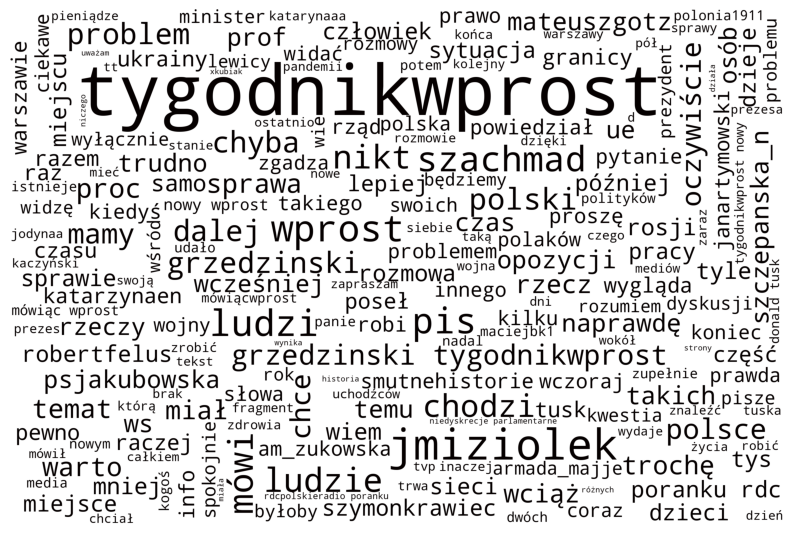

In [4]:
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# Extended https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt
stop_words = [
    'a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż', 'bardziej',
    'bardzo', 'beda', 'bedzie', 'bez', 'będą', 'bede', 'będę', 'będzie', 'bo', 'bowiem', 'by', 'byc', 'być', 'byl',
    'byla', 'byli', 'bylo', 'byly', 'był', 'była', 'było', 'były', 'bynajmniej', 'cala', 'cali', 'caly', 'cała',
    'cały', 'ci', 'cie', 'ciebie', 'cię', 'co', 'cokolwiek', 'cos', 'coś', 'czasami', 'czasem', 'czemu', 'czy',
    'czyli', 'czym', 'daleko', 'da', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokad', 'dokąd', 'dosc', 'dość',
    'duzo', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dzis', 'dzisiaj', 'dziś', 'gdy', 'gdyby', 'gdyz', 'gdyż',
    'gdzie', 'gdziekolwiek', 'gdzies', 'gdzieś', 'go', 'i', 'ich', 'ile', 'im', 'inna', 'inne', 'inny', 'innych',
    'itd', 'iz', 'iż', 'ja', 'jak', 'jaka', 'jakas', 'jakaś', 'jakby', 'jaki', 'jakichs', 'jakichś', 'jakie',
    'jakieś', 'jakis', 'jakies', 'jakiś', 'jakiz', 'jakiż', 'jakkolwiek', 'jako', 'jakos', 'jakoś', 'ją', 'je',
    'jeden', 'jedna', 'jednak', 'jednakze', 'jednakże', 'jedno', 'jego', 'jej', 'jemu', 'jesli', 'jest', 'jestem',
    'jeszcze', 'jeśli', 'jezeli', 'jeżeli', 'juz', 'już', 'kazdy', 'każdy', 'kiedy', 'kilka', 'kims', 'kimś', 'kto',
    'ktokolwiek', 'ktora', 'ktore,', 'ktorego', 'ktorej', 'ktory', 'ktorych', 'ktorym', 'ktorzy', 'ktos', 'ktoś',
    'która', 'które', 'którego', 'której', 'który', 'których', 'którym', 'którzy', 'ku', 'lat', 'lecz', 'lub',
    'ma', 'mają', 'maja', 'mało', 'mam', 'mi', 'miedzy', 'między', 'mimo', 'mna', 'mną', 'mnie', 'moga', 'mogą',
    'moi', 'moim', 'moj', 'moja', 'moje', 'moze', 'mozliwe', 'mozna', 'może', 'możliwe', 'mój', 'można', 'mu',
    'musi', 'my', 'na', 'nad', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'naszego', 'naszych',
    'natomiast', 'natychmiast', 'nawet', 'nia', 'niby', 'nic', 'nią', 'nie', 'nich', 'niech', 'niego', 'niej',
    'niemu', 'niemu', 'nigdy', 'nim', 'nimi', 'niz', 'niż', 'no', 'np', 'nr', 'o', 'obok', 'oby', 'od', 'ok',
    'około', 'on', 'ona', 'one', 'oni', 'ono', 'oraz', 'oto', 'owszem', 'pan', 'pana', 'pani', 'po', 'pod',
    'podczas', 'pomimo', 'ponad', 'poniewaz', 'ponieważ', 'powinien', 'powinna', 'powinni', 'powinno', 'poza',
    'prawie', 'przeciez', 'przecież', 'przed', 'przede', 'przedtem', 'przez', 'przy', 'roku', 'rowniez',
    'również', 'rt', 'sam', 'sama', 'są', 'sie', 'się', 'skad', 'skąd', 'soba', 'sobą', 'sobie', 'sposob',
    'sposób', 'swoje', 't', 'tt', 'ta', 'tak', 'taka', 'taki', 'takie', 'takze', 'także', 'tam', 'te', 'tę', 
    'tego', 'tej', 'ten', 'teraz', 'też', 'to', 'toba', 'tobą', 'tobie', 'totez', 'toteż', 'totobą', 'trzeba',
    'tu', 'tutaj', 'twoi', 'twoim', 'twoj', 'twoja', 'twoje', 'twój', 'twym', 'ty', 'tych', 'tylko', 'tym',
    'u', 'w', 'wam', 'wami', 'was', 'wasz', 'wasza', 'wasze', 'we', 'według', 'wiele', 'wielu', 'więc', 'więcej',
    'wlasnie', 'właśnie', 'wszyscy', 'wszystkich', 'wszystkie', 'wszystkim', 'wszystko', 'wtedy', 'wy', 'z', 'za',
    'zaden', 'zadna', 'zadne', 'zadnych', 'zapewne', 'zawsze', 'ze', 'zeby', 'zeznowu', 'zł', 'znow', 'znowu',
    'znów', 'zostal', 'został', 'żaden', 'żadna', 'żadne', 'żadnych', 'że', 'żeby'
] 

merged_tweets = separator.join(tweets).lower()

merged_tweets = re.sub(r'http\S+', '', merged_tweets)

words = merged_tweets.split()

trimmed_words = list()

for word in words:
    word = re.sub('\W+','', word)
    if word not in stop_words and not word.startswith('@'):
        trimmed_words.append( word )

text = ' '.join(trimmed_words)

wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate(text)

wordcloud.recolor(color_func = black_color_func)

plt.figure(figsize=[10, 15])

plt.imshow(wordcloud)

plt.axis("off")

## Step 5 - Named Entity Recognition

In [5]:
import spacy
from spacy import displacy
from collections import Counter

nlp = spacy.load("pl_core_news_lg")

content = nlp(merged_tweets)

In [6]:
# render text with marked named entities
displacy.render(content, jupyter=True, style='ent')

In [12]:
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

lemmas = list()

content = nlp(text)

for token in content:
  lemmas.append(token.lemma_)

finder = BigramCollocationFinder.from_words(lemmas)
bgm = BigramAssocMeasures()
collocations = {bigram: pmi for bigram, pmi in finder.score_ngrams(bgm.mi_like)}
collocations

{('poranek', 'rdc'): 19.148936170212767,
 ('rdc', '730'): 9.633333333333333,
 ('Donald', 'Tusk'): 8.827541827541827,
 ('leszekmiller', 'giertychroman'): 6.666666666666667,
 ('niedyskrecje', 'parlamentarny'): 5.647058823529412,
 ('spełniać', 'wymóg'): 5.444444444444445,
 ('wymóg', 'zatrudnienie'): 5.444444444444445,
 ('jankanthak', 'piotrpyzik'): 5.142857142857143,
 ('donaldtusk', 'leszekmiller'): 4.4366666666666665,
 ('pgenarodowy', 'grupa_pge'): 4.408163265306122,
 ('artykuł', '212'): 4.288235294117647,
 ('le', 'pen'): 4.166666666666667,
 ('mein', 'kampf'): 4.0,
 ('polskapolicja', 'pk_gov_pl'): 4.0,
 ('boxingfun', 'K_stanowski'): 3.8983957219251337,
 ('sasinjacek', 'jankanthak'): 3.857142857142857,
 ('zjednoczyć', 'prawica'): 3.811111111111111,
 ('radekfogiel', 'jacekczarnecki1'): 3.769230769230769,
 ('karol_gac', '720'): 3.6,
 ('Aleksander', 'Kwaśniewski'): 3.5714285714285716,
 ('tłusty', 'kot'): 3.5714285714285716,
 ('rdcpolskieradio', 'komentator'): 3.272727272727273,
 ('motykamilo